In [1]:
from gensim.models.doc2vec import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

preprocessed_token = []
for text in data:
    text = text.replace(".","")
    preprocessed_token.append(word_tokenize(text.lower()))

In [3]:
model = Word2Vec(preprocessed_token, min_count=1,vector_size=2,workers=4, epochs=10)

In [4]:
unique=[]
for sentence in preprocessed_token:
    for token in sentence:
        if token not in unique:
            unique.append(token)
  
df = pd.DataFrame(columns=['x_vector','y_vector','token'])
for token in unique:
    df_temp = pd.DataFrame([[model.wv[token][0],model.wv[token][1],token]],columns=['x_vector','y_vector','token'])
    df = df.append(df_temp, ignore_index=True)

In [5]:
df

,x_vector,y_vector,token
0,0.255167,0.450464,i
1,-0.026648,0.011740,love
2,-0.376081,-0.196814,machine
3,-0.047320,0.288429,learning
4,0.317749,-0.170270,its
5,0.337847,0.038186,awesome
6,0.365588,0.253513,coding
7,-0.414261,-0.472441,in
8,0.143777,0.049604,python
9,-0.243013,-0.090679,building


In [6]:
similar_words = model.wv.most_similar('machine')
similar_words

[('building', 0.9921985268592834),
 ('chat', 0.986996054649353),
 ('well', 0.9854321479797363),
 ('in', 0.9327670931816101),
 ('love', 0.6238806247711182),
 ('chatbots', 0.12300365418195724),
 ('learning', -0.3141138553619385),
 ('its', -0.5619442462921143),
 ('they', -0.7731523513793945),
 ('i', -0.8401312828063965)]

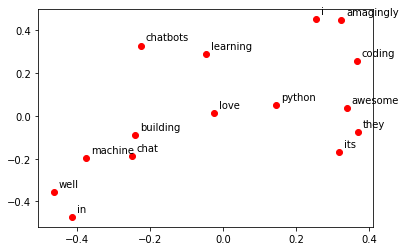

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.x_vector,df.y_vector, 'ro')
count=0
for x,y,label in zip(df.x_vector,df.y_vector,df.token):
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,5), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import pandas as pd

In [9]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [10]:
max_epochs = 1
vec_size = 2
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=max_epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [11]:
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.08444298 -0.23962939]
[('3', 0.36674386262893677), ('0', 0.0052577778697013855), ('2', -0.7060444355010986)]
[-0.49403775  0.42764223]


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
df = pd.DataFrame(columns=['x_vector','y_vector'])

In [14]:
for i in range(len(data)):
    df_temp = pd.DataFrame([[model.dv[str(i)][0],model.dv[str(i)][1]]],columns=['x_vector','y_vector'])
    df = df.append(df_temp, ignore_index=True)

In [15]:
df

,x_vector,y_vector
0,-0.261578,-0.298999
1,-0.494038,0.427642
2,0.178298,0.013113
3,-0.494031,-0.258332


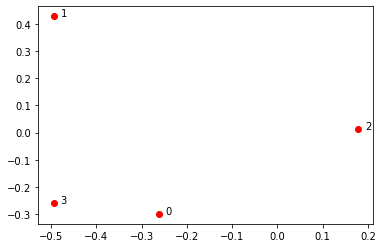

In [16]:
plt.plot(df.x_vector,df.y_vector, 'ro')
count=0
for x,y in zip(df.x_vector,df.y_vector):

    label = f"{count}"
    count +=1

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [17]:
max_epochs = 1
vec_size = 2
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=max_epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [18]:
df = pd.DataFrame(columns=['x_vector','y_vector'])
for i in range(len(data)):
    df_temp = pd.DataFrame([[model.dv[str(i)][0],model.dv[str(i)][1]]],columns=['x_vector','y_vector'])
    df = df.append(df_temp, ignore_index=True)

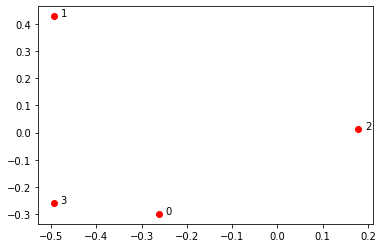

In [19]:
plt.plot(df.x_vector,df.y_vector, 'ro')
count=0
for x,y in zip(df.x_vector,df.y_vector):

    label = f"{count}"
    count +=1

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'Planned_End': np.random.uniform(low=-5, high=5, size=50),
                   'Actual_End':  np.random.uniform(low=-1, high=1, size=50),
                   'Late':        np.random.randint(low=0,  high=2, size=50)}
)

X = df[['Planned_End', 'Actual_End']]
y = df['Late']

In [3]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X.values, y.values)

SVC(decision_function_shape='ovo')

Text(0.5, 1.0, 'SVM Decision Region Boundary')

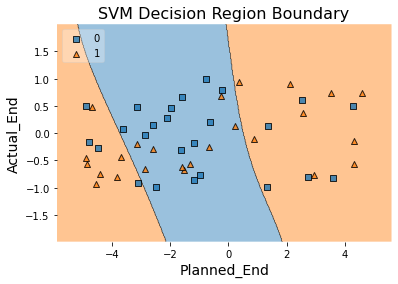

In [23]:
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [24]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [25]:
emmbed_dict = {}
with open('GloVe/glove.6B.200d.txt','r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],'float32')
        emmbed_dict[word]=vector

In [26]:
def find_similar_word(emmbedes):
    nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
    return nearest

In [27]:
find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'creek',
 'along',
 'tributaries',
 'valley',
 'flows',
 'danube']

In [28]:
find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'crown',
 'throne',
 'royal',
 'monarch',
 'kingdom',
 'duke']

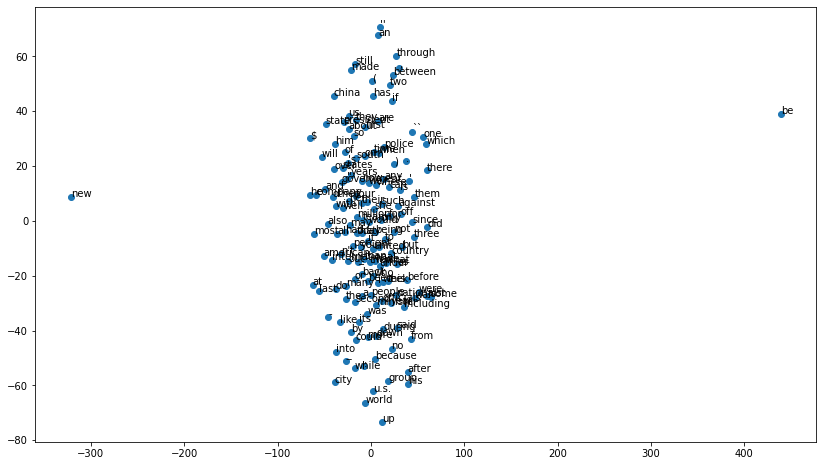

In [29]:
distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()